In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('../Data/auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Validation Set Approach (quadratic)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X = df['horsepower'].values
y = df['mpg'].values

X = X.reshape(df.shape[0], 1)
y = y.reshape(df.shape[0], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_poly,y_train)
y_pred = reg.predict(X_test_poly)

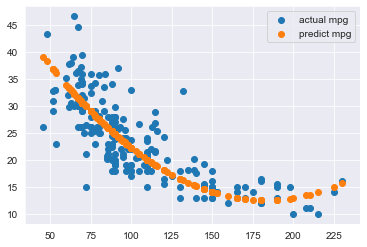

In [6]:
plt.scatter(x=X_test, y=y_test, label='actual mpg')
plt.scatter(x=X_test, y=y_pred, label='predict mpg')
plt.legend()

In [7]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

20.63239589582455

## LOOCV

In [8]:
# Doing linear regression with leave one out cross val
from sklearn.model_selection import cross_validate, cross_val_score, LeaveOneOut, GridSearchCV
    
loo = LeaveOneOut()

regr = LinearRegression()

scores = cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=loo,)

# This will print the mean of the list of errors that were output and 
# provide your metric for evaluation
print (-scores.mean())

24.231513517929226


In [9]:
from sklearn.model_selection import GridSearchCV

# scores = cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=5)

scores = []
for i in range(2,4):
    print(i)
    score = cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=i)
    scores.append(-score.mean())
    
best_cv = np.argmin(scores)
min_score = min(scores)

regr.fit(X,y)     
print('Best:\n- score: {}\n- cv: {}'.format(min_score, best_cv+2))

2
3
Best:
- score: 39.74755995675202
- cv: 3


## Bootstrap (Multiple Sampling With Replacement)

In [10]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

ensemble = BaggingClassifier(base_estimator=RandomForestClassifier(),
                             bootstrap=True,
                             bootstrap_features=False,
                             oob_score=True)

# ensemble.fit(X_train, y_train)

## Questions

### 5.

In [13]:
## a
df = pd.read_csv('../Data/default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [14]:
from sklearn.linear_model import LogisticRegression

X = df[['income', 'balance']]
y = df['default']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

print('R2: {:.2f}%'.format(clf.score(X_test,y_test) * 100))

R2: 97.05%


In [15]:
for split_size in [0.2, 0.3, 0.4]:
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=split_size, random_state=1)

    clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

    y_val_pred = clf.predict(X_val)
    score = clf.score(X_val,y_val)
    
    print(f'{split_size}: {round((1 - score) * 100, 2)}%')

0.2: 3.87%
0.3: 2.76%
0.4: 3.74%


### 8.

In [16]:
np.random.seed(1)
X = np.random.randn(100)
y = np.random.randn(100)
y = X - 2 * X ** 2 + np.random.rand(100)

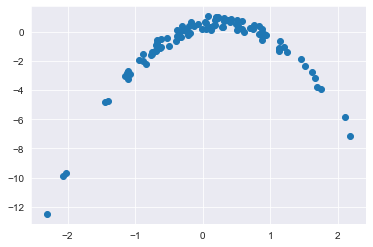

In [17]:
plt.scatter(X,y)

In [18]:
# Doing linear regression with leave one out cross val
from sklearn.model_selection import cross_validate, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

ones = np.ones(len(X))
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

X_arr = [X]

for exponent in [2,3,4]:
    poly = PolynomialFeatures(degree=exponent)
    X_arr.append(poly.fit_transform(X))

loo = LeaveOneOut()
regr = LinearRegression()

for i, X_ in enumerate(X_arr):
    score = cross_val_score(regr, X_, y, scoring='neg_mean_squared_error', cv=loo,)
    print(f'{i}. {-score.mean()}')

0. 5.45606515081399
1. 0.07527564319525544
2. 0.07814579128255163
3. 0.07817560404409009


In [19]:
# Doing linear regression with leave one out cross val
from sklearn.model_selection import cross_validate, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# use a different random seed
np.random.seed(3)

ones = np.ones(len(X))
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

X_arr = [X]

for exponent in [2,3,4]:
    poly = PolynomialFeatures(degree=exponent)
    X_arr.append(poly.fit_transform(X))

loo = LeaveOneOut()
regr = LinearRegression()

for i, X_ in enumerate(X_arr):
    score = cross_val_score(regr, X_, y, scoring='neg_mean_squared_error', cv=loo,)
    print(f'{i}. {-score.mean()}')

0. 5.45606515081399
1. 0.07527564319525544
2. 0.07814579128255163
3. 0.07817560404409009


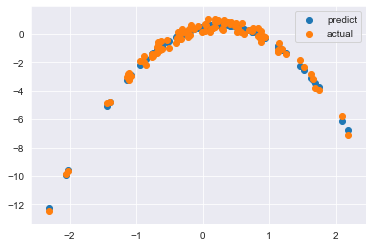

In [20]:
regr = LinearRegression().fit(X_arr[2], y)
plt.scatter(X, regr.predict(X_arr[2]), label='predict')
plt.scatter(X, y, label='actual')
plt.legend()